## Importação  

In [1]:

import numpy as np 
import pandas as pd 
import cv2
from keras.utils import np_utils
from keras.preprocessing import image
from sklearn.metrics import classification_report

# Importação das funções necessárias do Keras. 
# Sequential é um tipo de modelo que representa uma pilha linear de camadas. 
# As outras importações são diferentes tipos de camadas que podemos adicionar a esse modelo.

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Definindo Parametros

In [2]:
batch_size  = 16
input_shape = (150, 150, 3)

## Carregando nossos dados

Shape: (375, 500, 3)


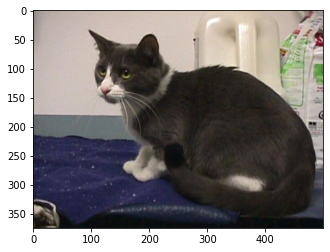

In [3]:
path_folder = '/kaggle/input/cats-dogs/CATS_DOGS'
cat4 = cv2.imread(path_folder+'/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
print(f'Shape: {cat4.shape}')
plt.imshow(cat4);

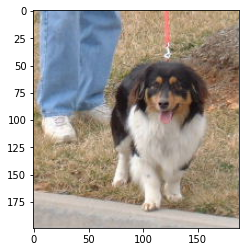

In [4]:
dog2 = cv2.imread(path_folder+'/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)
plt.imshow(dog2);

## Preparando os dados para o modelo

### Manipulação de imagens

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Aumentando os dados ao gerar novas imagens a partir das imagens já existentes. 
# Cada parâmetro passado na classe ImageDataGenerator altera características das imagens existentes, 
#    como zoom, largura, rotação, escala e etc. 

image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

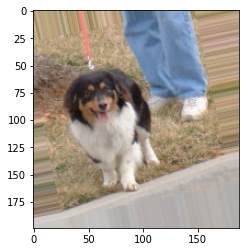

In [6]:
plt.imshow(image_gen.random_transform(dog2));

In [7]:
image_gen.flow_from_directory(path_folder+'/train');

Found 18743 images belonging to 2 classes.


# Construção do modelo

In [8]:
# Isso inicializa um modelo sequencial vazio ao qual podemos adicionar camadas.
model = Sequential()

# A camada convolucional possui 32 filtros (ou kernels) de tamanho 3x3 e usa a função de ativação ReLU. 
# A camada de pooling tem o objetivo de reduzir a dimensionalidade espacial dos dados, 
#   usando uma janela de tamanho 2x2.

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# A camada convolucional possui 64 filtros (ou kernels) de tamanho 3x3 e usa a função de ativação ReLU. 

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# A camada convolucional possui 64 filtros (ou kernels) de tamanho 3x3 e usa a função de ativação ReLU. 

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Os dados são vetorizados para serem alimentados em camadas totalmente conectadas 

model.add(Flatten())

# Adicionamos uma camada totalmente conectada com 128 neurônios. 

model.add(Dense(128))

# Usamos a função de ativação ReLU. 

model.add(Activation('relu'))

#  Camada de Dropout com uma taxa de 0,5 usada para prevenir o overfitting
model.add(Dropout(0.5))

# Camada com 1 neurônio, que é nossa camada de saída. 

model.add(Dense(1))

# Função de ativação "sigmoid" - tarefa de classificação binária

model.add(Activation('sigmoid'))

# Otimizador: Adam lgoritmo adaptativo de otimização da taxa de aprendizado 
# Função de Perda: Mede quão bem o modelo está fazendo. Menor é melhor.
# Binary Cross-entropy: Usada quando decidimos entre duas opções (ex: gato ou cachorro).
# Acurácia: Porcentagem de vezes que o modelo fez a previsão correta.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Resumo da arquitetura do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
# Uma boa prática é não passar o conjunto de dados inteiro para a rede neural de uma só vez. 
# Logo, é possível dividir o conjunto de dados em número de lotes ou conjuntos ou partes. 
# Dai a importância do batch_size.

train_image_gen = image_gen.flow_from_directory(path_folder+'/train', 
                                                target_size=input_shape[:2],
                                                batch_size = batch_size, 
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory(path_folder+'/test', 
                                                target_size=input_shape[:2],
                                                batch_size = batch_size, 
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [11]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [12]:
# Época: Uma passagem completa pelo conjunto de dados inteiro.
# Iterações: Número de lotes processados para completar uma época.

%%time
results = model.fit_generator(train_image_gen, 
                              epochs           = 100, 
                              steps_per_epoch  = 150,
                              validation_data  = test_image_gen, 
                              validation_steps =15)

UsageError: Line magic function `%%time` not found.


In [ ]:
results.history['val_accuracy']

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Época')
plt.grid()
plt.savefig('loss.png')

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.grid()
plt.savefig('accuracy.png')

# Classificando Novas Imagens

In [ ]:
dog_file = path_folder+'/train/DOG/6.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [ ]:
prediction_prob = model.predict(dog_img)

print(f'Probability that image is a dog is: {prediction_prob} ')